In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
n = 500
T = 2000
sigma = 1
x = np.random.normal(0, sigma, (T, n))

In [51]:
C = np.dot(x.T, x) / T

### Eigen values of normally distributed random variables

In [52]:
w, v = np.linalg.eig(C)

In [111]:
w.sort()

### Marcenko-Pastur Probability distribution function

In [93]:
def mpPDF(t, n, sigma, pts = 20):
    q = float(n) / t
    lambdap = np.power(sigma * (1 + np.sqrt(q)), 2)
    lambdan = np.power(sigma * (1 - np.sqrt(q)), 2)
    x = np.linspace(lambdan, lambdap, pts)
    y = q * np.sqrt((lambdap - x) * (x - lambdan)) / (2 * np.pi*x*np.power(sigma,2))
    return (x, y)

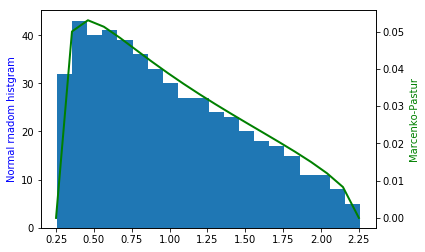

In [113]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist(w, bins=20)
ax2.plot(*mpPDF(T, n, sigma), 'g-', lw = 2)
ax1.set_ylabel('Normal rnadom histgram', color='b')
ax2.set_ylabel('Marcenko-Pastur', color='g')

plt.show()

In [127]:
from sklearn.neighbors.kde import KernelDensity
# Why not use sklearn.decomposition.PCA?
def getPCA(matrix):
    eVal, eVec = np.linalg.eigh(matrix)
    indices = eVal.argsort()[::-1]
    eVal, eVec = eVal[indices],eVec[:, indices]
    eVal = np.diagflat(eVal)
    return eVal, eVec

def fitKDE(obs, bWidth = 0.25, kernel = 'gaussian', x = None):
    if len(obs,shape) == 1:
        obs = obs.reshape(-1, 1)
    kde = KernelDensity(kernel= kernel, bandwidth=bWidth).fit(obs)
    if x is None:
        x = np.unique(obs).reshape(-1, 1)
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)
    logProb = kde.score_samples(x)
    pdf = pd.Series(np.exp(logProb), index = x.flatten())
    return pdf

In [129]:
def getRndConv(nCols, nFacts):
    w = np.random.normal(size = (nCols, nFacts))
    cov = np.dot(w, w.T)
    cov += np.diag(np.random.uniform(size = nCols))
    return cov

def cov2corr(cov):
    std = np.sqrt(np.diag(cov))
    corr = cov / np.outer(std, std)
    corr[corr < -1], corr[corr > 1] = -1, 1
    return corr

alpha, nCols, nFact = 0.995, 1000, 100
q = int(nCols / nFact)
cov = np.cov(np.random.normal(size = (nCols * q, nCols)), rowvar=0)
cov = alpha * cov + (1 - alpha) * getRndConv(nCols, nFact)
corr0 = cov2corr(cov)
eVal10, eVec = getPCA(corr0)